# InterSystems IRIS の Native API for Python を使ってNetworkXのデータを作ってみよう！

- [1] irisnative パッケージのインポート
    - matplotlib と networkx もインポート
- [2] IRISに接続＋IRISオブジェクトの作成
- [3] データ（^Correlation）の作成
- [4] [3]で設定した値の取得

[1] irisnative パッケージのインポート
 - matplotlib と networkx もインポート

In [1]:
import irisnative
import networkx as nx
import matplotlib.pyplot as plt
G=nx.DiGraph()

関数を定義（登場人物の関係者を拾い出す）

In [2]:
def getCorrelation(source,graph,count):
    if count>3:
        return

    #ラベル表示用のデータ取得
    labellist[source]=iris_native.get("Correlation",source)

    iter = iris_native.iterator("Correlation",source)
    nodelist=[source for source in iter.subscripts() ]
    edgelist=[(source,target) for target in nodelist]
    graph.add_nodes_from(nodelist)
    graph.add_edges_from(edgelist)

    for target in nodelist:
        #ラベル表示用のデータ取得
        labellist[target]=iris_native.get("Correlation",target)
        getCorrelation(target,graph,count+1)

[2] IRISに接続＋IRISオブジェクトの作成

In [3]:
connection = irisnative.createConnection("iris",1972,"user","_system","SYS")
iris_native = irisnative.createIris(connection)

[3] 登場人物の登録

networkxのラベル名が見易くなるように登場人物の説明に改行を入れています。

＜IRIS側での設定例＞ set ^Correlation("Eren")="主人公（エレン）

In [4]:
iris_native.set("主人公\n（エレン）","Correlation","Eren")
iris_native.set("エレンの幼馴染\n（アルミン）","Correlation","Armin")
iris_native.set("エレンの幼馴染\n（ミカサ）","Correlation","Mikasa")
iris_native.set("エレンのお父さん\n（グリシャ）","Correlation","Grisha")
iris_native.set("エレンの異母兄弟\n（ジーク）","Correlation","Zeke")
iris_native.set("鎧の巨人\n（ライナー）","Correlation","Reiner")
iris_native.set("超大型の巨人\n（ベルトルト）","Correlation","Bertolt")
iris_native.set("エレンのお母さん（カルラ）\nダイナに捕食","Correlation","Carla")
iris_native.set("ジークのお母さん（ダイナ）\nレイス王家[フリッツ家]","Correlation","Dina")
iris_native.set("人類最強の兵士\n（リヴァイ）","Correlation","Levi")

関係性を設定

＜IRIS側での設定例＞ set ^Correlation("Eren","Mikasa")=""

In [5]:
iris_native.set(None,"Correlation","Eren","Mikasa")
iris_native.set(None,"Correlation","Eren","Armin")
iris_native.set(None,"Correlation","Armin","Mikasa")
iris_native.set(None,"Correlation","Mikasa","Armin")
iris_native.set(None,"Correlation","Armin","Eren")
iris_native.set(None,"Correlation","Mikasa","Eren")
iris_native.set(None,"Correlation","Grisha","Eren")
iris_native.set(None,"Correlation","Grisha","Zeke")
iris_native.set(None,"Correlation","Eren","Zeke")
iris_native.set(None,"Correlation","Zeke","Eren")
iris_native.set(None,"Correlation","Grisha","Dina")
iris_native.set(None,"Correlation","Dina","Grisha")           
iris_native.set(None,"Correlation","Grisha","Carla")
iris_native.set(None,"Correlation","Carla","Grisha")
iris_native.set(None,"Correlation","Dina","Carla")
iris_native.set(None,"Correlation","Armin","Bertolt")
iris_native.set(None,"Correlation","Reiner","Bertolt")
iris_native.set(None,"Correlation","Bertolt","Reiner")
iris_native.set(None,"Correlation","Levi","Zeke")

[4] 全件取得

In [6]:
for source,value in iris_native.iterator("Correlation"):
    print(source,"-",value)

    for target,value in iris_native.iterator("Correlation",source):
        print("  関係者：",target)

Armin - エレンの幼馴染
（アルミン）
  関係者： Bertolt
  関係者： Eren
  関係者： Mikasa
Bertolt - 超大型の巨人
（ベルトルト）
  関係者： Reiner
Carla - エレンのお母さん（カルラ）
ダイナに捕食
  関係者： Grisha
Dina - ジークのお母さん（ダイナ）
レイス王家[フリッツ家]
  関係者： Carla
  関係者： Grisha
Eren - 主人公
（エレン）
  関係者： Armin
  関係者： Mikasa
  関係者： Zeke
Grisha - エレンのお父さん
（グリシャ）
  関係者： Carla
  関係者： Dina
  関係者： Eren
  関係者： Zeke
Levi - 人類最強の兵士
（リヴァイ）
  関係者： Zeke
Mikasa - エレンの幼馴染
（ミカサ）
  関係者： Armin
  関係者： Eren
Reiner - 鎧の巨人
（ライナー）
  関係者： Bertolt
Zeke - エレンの異母兄弟
（ジーク）
  関係者： Eren


[5] 登場人物を特定して関係者取得


******************************
Leviに関連する人物を探します
******************************


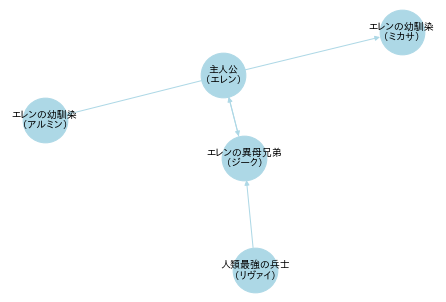

In [7]:
print("\n******************************")
print("Leviに関連する人物を探します")
print("******************************")
#ラベル用辞書の初期化
labellist={}
#関係者を取得
getCorrelation("Levi",G,1)

#nx.draw(G, labels=labellist,font_family='MS Gothic',font_size=10,
nx.draw(G, labels=labellist,font_family='TakaoPGothic',font_size=10,
            node_color="lightblue",edge_color="lightblue",node_size=2000)
plt.show()

[6]接続終了

In [8]:
connection.close()